In [1]:
#importamos librerías a usar
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Definimos la función a pasarle al integrador,
#se define desacoplando las funciones de 2ª orden en 2 ec. de primer orden
#y las de primer orden quedan como están:
# Gus: cambié los nombre de algunas variables respecto
# a lo que habías hecho vos:
#theta es theta y omega es d(theta)/dt
#phi es phi y chi es d(phi)/dt
#w3, vx, vy, vz están como las definiste vos
#Las otra les cambie el nombre porque me mareaban los nombres :D
#

def tippietop(t,y0,m,R,alfa,I1,I3,g,mu):

    theta, omega, phi, chi, w3, vx, vy, gn = y0

    domega_dt  = (np.sin(theta) / I1) * (I1 * np.square(chi) * np.cos(theta) - I3 * w3 * chi - R * alfa * gn) + ((R* mu * gn * vx) / I1) * (1 - alfa * np.cos(theta))
    a = (I3 * omega * w3) - (2 * I1 * omega * chi * np.cos(theta)) - (mu * gn * vy * R * (alfa - np.cos(theta)))
    b = I1 * np.sin(theta)
    dchi_dt = (a) / (b)
    dw3 = -(mu * gn * R * vy * np.sin(theta)) / I3
    dvx = ((R * np.sin(theta)) / I1) * (chi * w3 * (I3 * (1 - np.cos(theta)) - I1) + gn * R * alfa * (1 - np.cos(theta)) - I1 * alfa * (np.square(omega) + np.square(chi * np.sin(theta)))) - ((mu * gn * vx) / (m * I1)) * (I1 + m * np.square(R * (1 - np.cos(theta)))) + chi * vy
    dvy = -((mu * gn * vy) / (m * I1 * I3)) * ((I1 * I3) + (m * np.square(R) * I3 * np.square(1 - np.cos(theta)))+ (m * np.square(R) * I1 * np.square(np.sin(theta)))) + ((w3 * omega * R) / I1) * (I3 * (alfa - np.cos(theta)) + I1 * np.cos(theta)) + chi * vx
    gn  = (m * g * I1 + (m * R * alfa) * (np.cos(theta) * (I1 * np.square(chi* np.sin(theta)) + I1 * np.square(omega)) - I3 * chi * w3)) / (I1 + m * np.square(alfa * R * np.sin(theta)) - m * np.square(R) * alfa * np.sin(theta) * (1 - alfa * np.cos(theta)) * mu * vx)

    return omega, domega_dt, chi, dchi_dt, dw3, dvx, dvy, gn

#Seteamos las condiciones iniciales
theta_init = 0.001 #ti
phi_init = 0. #G
chi_init = 0. #f como dicen los chavos ahora
omega_init = 0. #y
w3_init = 155.
vx_init = 0.
vy_init = 0.
gn_init = 0.02 * 9.8
cond_inic2 = [theta_init,omega_init,phi_init,chi_init,w3_init,vx_init,vy_init,gn_init]

#seteamos la serie temporal de input para el calculo
ts2 = np.linspace(0,5,100)

#Seteamos los parametros de entrada de la funcion
m = 0.02
R = 0.02
alfa = 0.2
I1 = (2 / 5) * m * np.square(R)
I3 = (8 / 25) * m * np.square(R)
g = 9.8
mu = 0.05

#Resolvemos la ecuaciòn con solve_ivp de la librerìa scipy.integrate
sol_tiptop = solve_ivp(tippietop, t_span=(0.,5.), y0=cond_inic2 ,args = (m,R,alfa,I1,I3,g,mu))

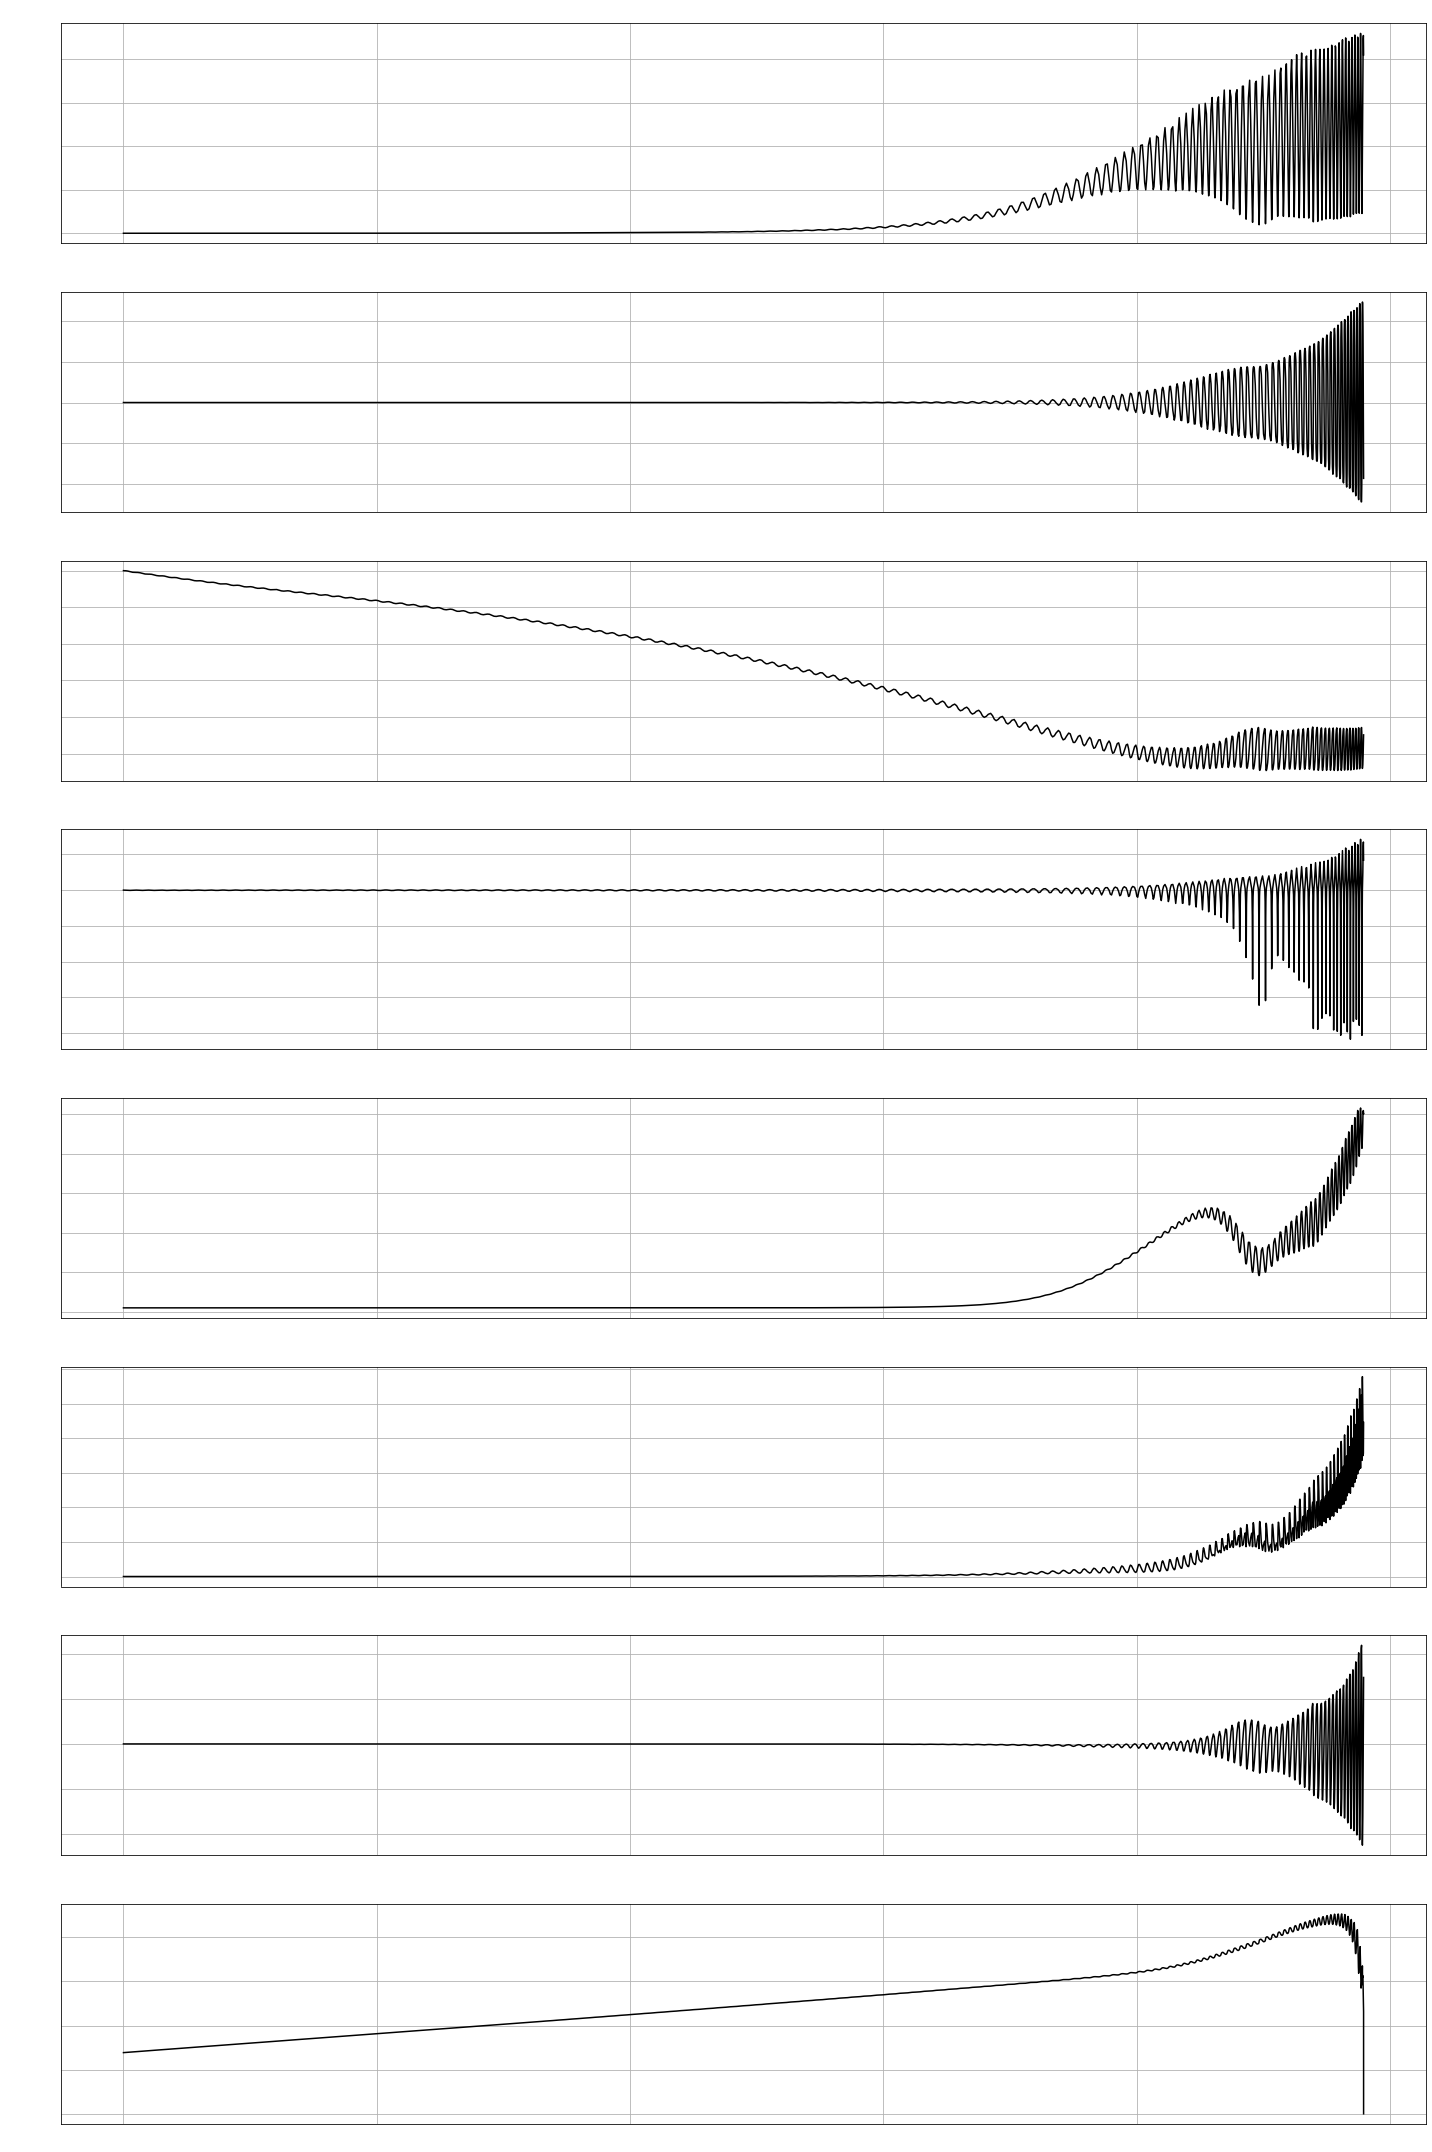

In [2]:
#Ploteamos el resultado
#Armamos la figura de 8 filas y una columna
fig2, axs = plt.subplots(nrows=8,ncols=1,figsize = (20,30))
col2 = 'white'

#Ploteamos theta(t)
axs[0].plot(sol_tiptop.t,sol_tiptop.y[0,:],'k')
axs[0].set_title('theta(t)',color= col2,fontsize = 14)
axs[0].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[0].grid(True)

#ploteamos theta'(t)
axs[1].plot(sol_tiptop.t,sol_tiptop.y[1,:],'k')
axs[1].set_title('omega(t)',color=col2,fontsize = 14)
axs[1].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[1].grid(True)

#Ploteamos phi(t)
axs[2].plot(sol_tiptop.t,sol_tiptop.y[2,:],'k')
axs[2].set_title('phi(t)',color=col2,fontsize = 14)
axs[2].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[2].grid(True)

#Ploteamos phi'(t)
axs[3].plot(sol_tiptop.t,sol_tiptop.y[3,:],'k')
axs[3].set_title('dphi(t)',color=col2,fontsize = 14)
axs[3].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[3].grid(True)

#ploteamos omega_z
axs[4].plot(sol_tiptop.t,sol_tiptop.y[4,:],'k')
axs[4].set_title('omega_z',color=col2,fontsize = 14)
axs[4].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[4].grid(True)

#plteamos Vx
axs[5].plot(sol_tiptop.t,sol_tiptop.y[5,:],'k')
axs[5].set_title('vx',color=col2,fontsize = 14)
axs[5].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[5].grid(True)

#Ploteamos Vy
axs[6].plot(sol_tiptop.t,sol_tiptop.y[6,:],'k')
axs[6].set_title('vy',color=col2,fontsize = 14)
axs[6].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[6].grid(True)

#ploteamos gn
axs[7].plot(sol_tiptop.t,sol_tiptop.y[7,:],'k')
axs[7].set_title('gn',color=col2,fontsize = 14)
axs[7].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[7].grid(True)

#Esto es para que no se superpongan los ploteos
fig2.tight_layout()